In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(x, w, b):
    size = len(x)
    y = np.zeros(size)
    for i in range(size):
        y[i] = np.dot(x[i], w) + b
    return y

In [3]:
def cost(y_pred, y):
    size = len(y)
    dif = y_pred - y
    return np.dot(dif, dif) / (2 * size)

In [4]:
def gradient(x, y, w, b):
    size = len(x)
    w_g = np.zeros(len(w))
    b_g = 0
    for i in range(size):
        pred = np.dot(x[i], w) + b
        dif = pred - y[i]
        w_g = w_g + dif * x[i]
        b_g = b_g + dif
    w_g = w_g / size
    b_g = b_g / size
    return w_g, b_g

In [5]:
def gradient_descent(x, y, w, b, alpha, iterCount):
    for i in range(iterCount):
        w_g, b_g = gradient(x, y, w, b)
        w = w - alpha * w_g
        b = b - alpha * b_g
        if i % 1000 == 0:
            y_pred = model(x_train, w, b)
            c = cost(y_pred, y_train)
            print(f"Iteration {i:4d}: Cost {c:8.2f}   ")
    return w, b

In [6]:
def zScore(x):
    std = np.std(x, axis = 0)
    mean = np.mean(x, axis = 0)
    return (x - mean) / std

In [7]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

x_norm = zScore(x_train)

w = np.zeros(len(x_train[0]))
b =  0

#b = 785.1811367994083
#w = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

alpha = 5.0e-7
iterCount = 10000

w, b = gradient_descent(x_train, y_train, w, b, alpha, iterCount)
print(f"w: {w}, b: {b}")

Iteration    0: Cost  2529.46   
Iteration 1000: Cost   686.69   
Iteration 2000: Cost   677.19   
Iteration 3000: Cost   668.48   
Iteration 4000: Cost   660.50   
Iteration 5000: Cost   653.19   
Iteration 6000: Cost   646.49   
Iteration 7000: Cost   640.35   
Iteration 8000: Cost   634.72   
Iteration 9000: Cost   629.56   
w: [ 0.21699899  0.03240792 -0.10755879 -0.5799772 ], b: -0.019077710470483206


In [8]:
y_pred = model(x_train, w, b)
for i in range(len(y_pred)):
    print(f"x: {x_train[i]}, y: {y_train[i]}, pred: {y_pred[i]}")

x: [2104    5    1   45], y: 460, pred: 430.50230063959395
x: [1416    3    2   40], y: 232, pred: 283.9345079675299
x: [852   2   1  35], y: 178, pred: 164.52211536512178


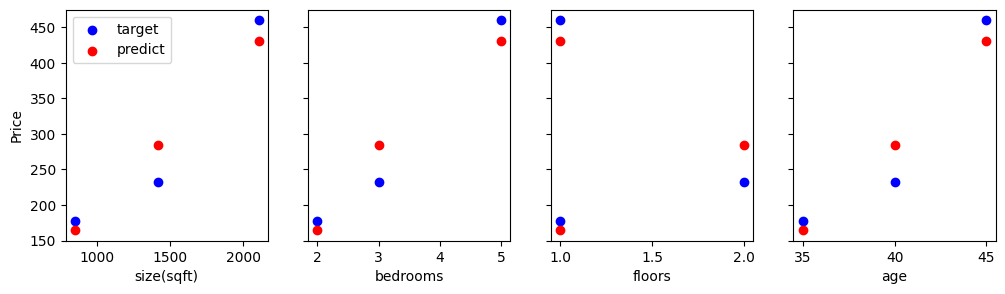

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey = True)

x_features = ['size(sqft)', 'bedrooms', 'floors', 'age']

for i in range(len(ax)):
    ax[i].scatter(x_train[:,i], y_train, c = "blue", label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i], y_pred, c = "red", label = 'predict')
ax[0].set_ylabel("Price"); 
ax[0].legend();

plt.show()